In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from ipywidgets import interact, IntRangeSlider


In [ ]:
!wget https://i.stack.imgur.com/o1z7p.jpg -O lenna.jpg
!wget https://i.stack.imgur.com/rskxh.jpg -O flower.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/d/db/License_plates_of_Russia_0101.jpg -O plate.jpg
!wget https://cdn0.weddingwire.com/vendor/022089/3_2/960/jpeg/-kmp3206-original_51_980220-168797078785884.jpeg -O faces.jpg
!wget https://mixkit.imgix.net/videos/preview/mixkit-weather-presenter-giving-newsroom-presentation-on-a-green-screen-28292-0.jpg -O chroma_key.jpg
!wget https://dynaimage.cdn.cnn.com/cnn/c_fill,g_auto,w_1200,h_675,ar_16:9/https%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F200728050748-daily-weather-forecast-tropics-hurricane-severe-storms-heat-hot-flash-flooding-00011830.jpg -O weather.jpg

--2023-12-09 09:10:52--  https://i.stack.imgur.com/o1z7p.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.196.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.196.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 738536 (721K) [image/jpeg]
Saving to: ‘lenna.jpg’

lenna.jpg           100%[===================>] 721.23K   997KB/s    in 0.7s    

2023-12-09 09:10:53 (997 KB/s) - ‘lenna.jpg’ saved [738536/738536]

--2023-12-09 09:10:53--  https://i.stack.imgur.com/rskxh.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.196.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.196.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117227 (114K) [image/jpeg]
Saving to: ‘flower.jpg’

flower.jpg          100%[===================>] 114.48K   353KB/s    in 0.3s    

2023-12-09 09:10:54 (353 KB/s) - ‘flower.jpg’ saved [117227/117227]

--2023-12-09 09:10:54--  https://upload.wikimedia.org/wiki

Image dimensions: (1960, 1960, 3)


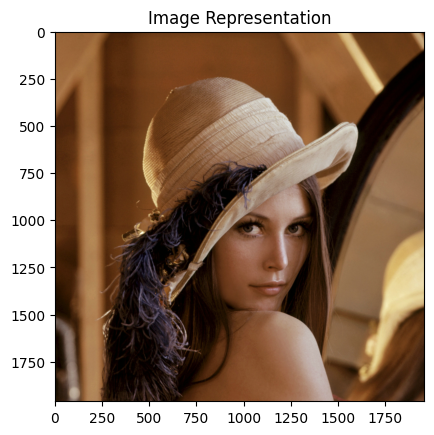

In [ ]:
image = cv2.imread('lenna.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

print(f"Image dimensions: {image.shape}")

plt.imshow(image)
plt.title('Image Representation')
plt.show()

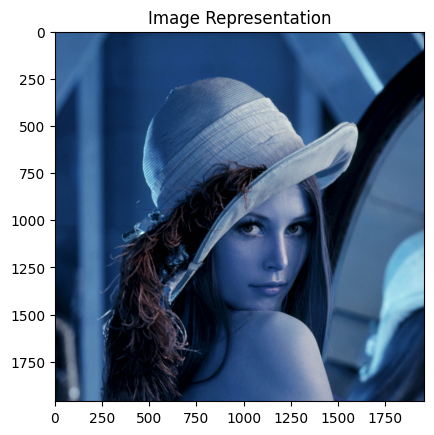

In [ ]:
image = cv2.imread('lenna.jpg')

plt.imshow(image)
plt.title('Image Representation')
plt.show()

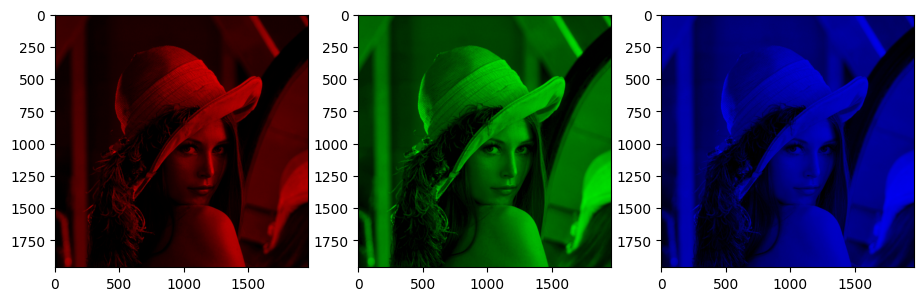

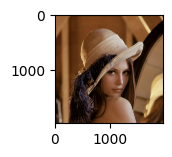

In [ ]:
b = image[:,:,0]
g = image[:,:,1]
r = image[:,:,2]

zeros = np.zeros_like(b)

plt.figure(figsize=(15, 6))
plt.subplot(1, 4, 1)
plt.imshow(cv2.merge([b, zeros, zeros]))

plt.subplot(1, 4, 2)
plt.imshow(cv2.merge([zeros, g, zeros]))

plt.subplot(1, 4, 3)
plt.imshow(cv2.merge([zeros, zeros, r]))
plt.show()

b = image[:,:,0]
g = image[:,:,1]
r = image[:,:,2]

plt.subplot(1, 4, 4)
plt.imshow(cv2.merge([r, g, b]))
plt.show()

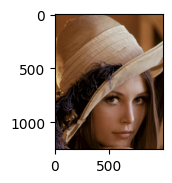

In [ ]:
plt.subplot(1, 4, 4)
plt.imshow(cv2.merge([r, g, b])[250:1500,500:1500])
plt.show()

![alt text](https://i.stack.imgur.com/Sd3MJ.png "Title")

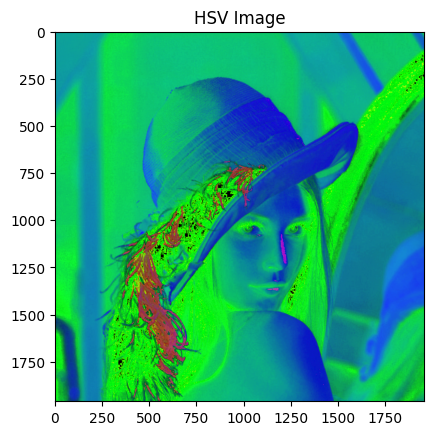

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

plt.imshow(hsv_image)
plt.title('HSV Image')
plt.show()

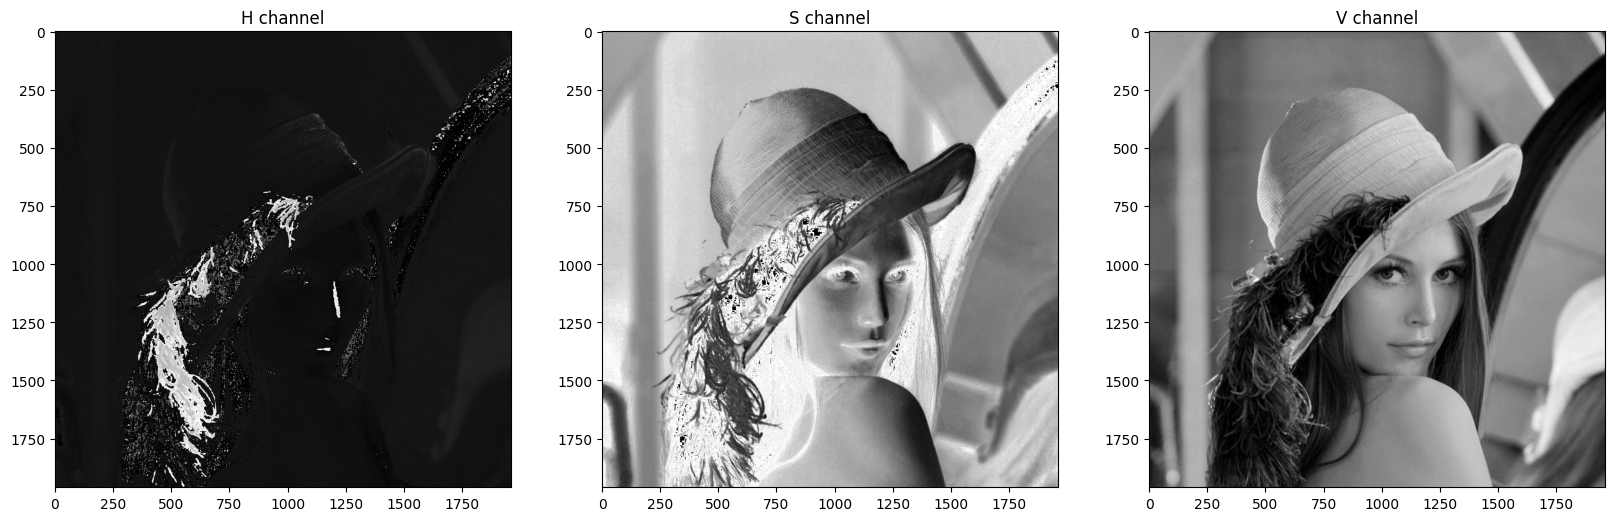

In [ ]:
h = hsv_image[:,:,0]
s = hsv_image[:,:,1]
v = hsv_image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

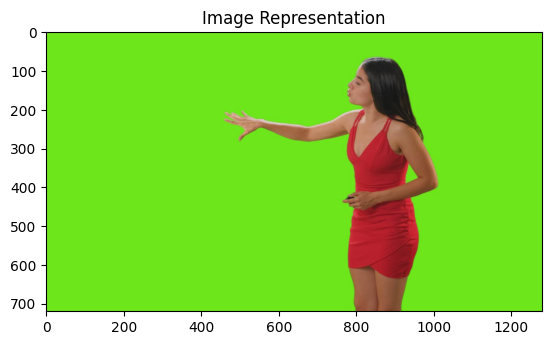

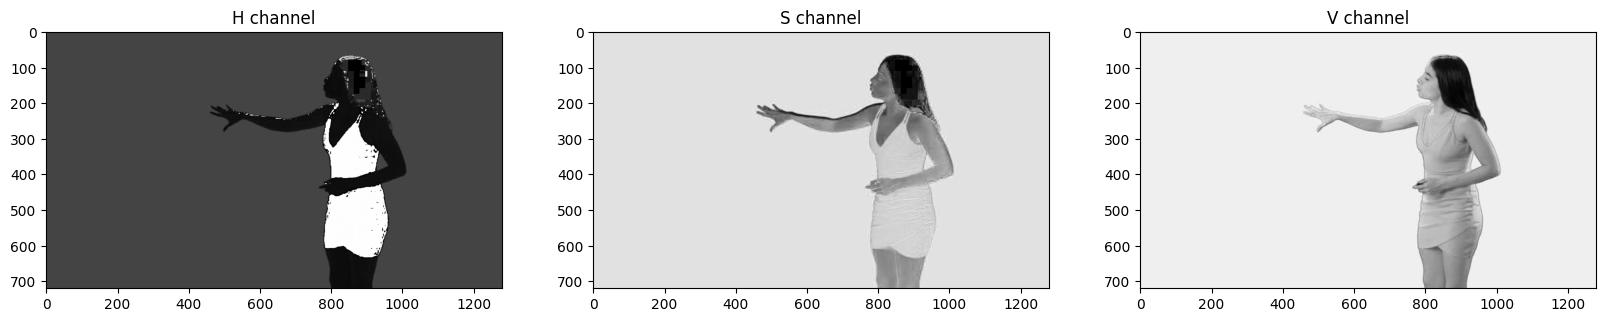

In [ ]:
image = cv2.imread('chroma_key.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Image Representation')
plt.show()

hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

h = hsv_image[:,:,0]
s = hsv_image[:,:,1]
v = hsv_image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

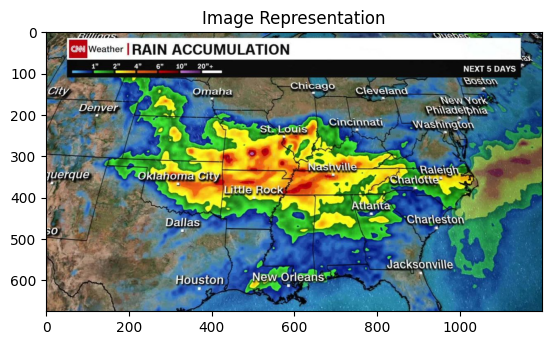

In [ ]:
image = cv2.imread('weather.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Image Representation')
plt.show()

Task 1
Replace the green screen (chroma key) in an image with another image

Ideas?...

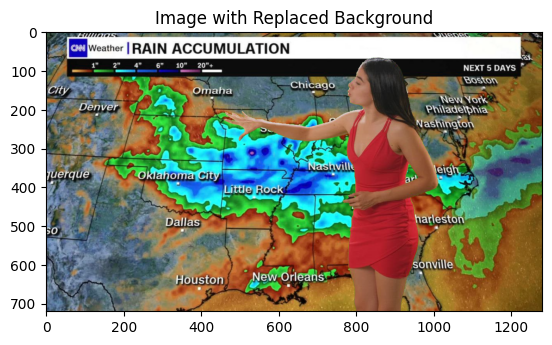

In [ ]:
chroma_key_image = cv2.imread('chroma_key.jpg')
weather_image = cv2.imread('weather.jpg')

# Convert chroma key image to RGB (for display purposes)
chroma_key_rgb = cv2.cvtColor(chroma_key_image, cv2.COLOR_BGR2RGB)
weather_rgb = cv2.cvtColor(weather_image, cv2.COLOR_BGR2RGB)

# Resize weather image to match chroma key image dimensions
weather_image = cv2.resize(weather_image, (chroma_key_rgb.shape[1], chroma_key_rgb.shape[0]))

# Convert chroma key image to HSV
hsv_image = cv2.cvtColor(chroma_key_rgb, cv2.COLOR_RGB2HSV)

# Define range of green color in HSV
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Create a mask for the green color
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Copy the chroma key image
chroma_key_copy = np.copy(chroma_key_rgb)

# Zero out the green screen in the copy
chroma_key_copy[mask != 0] = [0, 0, 0]

# Add the weather image to the areas zeroed out in the chroma key copy
result = weather_image.copy()
result[mask == 0] = chroma_key_copy[mask == 0]

# Display the image
plt.imshow(result)
plt.title('Image with Replaced Background')
plt.show()

In [ ]:
def hsv_filtering(h_range, s_range, v_range):
    # Adjust HSV ranges
    lower_hsv = np.array([h_range[0], s_range[0], v_range[0]])
    upper_hsv = np.array([h_range[1], s_range[1], v_range[1]])

    # Threshold the HSV image to get only selected colors
    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)

    # Bitwise-AND mask and original image
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

    # Display the result
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap='gray')
    plt.title('HSV Mask')
    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.title('HSV Filtered Image')
    plt.show()


image = cv2.imread('flower.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

h_slider = IntRangeSlider(value=[0, 179], min=0, max=179, step=1, description='Hue')
s_slider = IntRangeSlider(value=[0, 255], min=0, max=255, step=1, description='Saturation')
v_slider = IntRangeSlider(value=[0, 255], min=0, max=255, step=1, description='Value')

# Create the interaction between widgets and the function
interact(hsv_filtering, h_range=h_slider, s_range=s_slider, v_range=v_slider)

interactive(children=(IntRangeSlider(value=(0, 179), description='Hue', max=179), IntRangeSlider(value=(0, 255…

<function __main__.hsv_filtering(h_range, s_range, v_range)>

In [ ]:
image = cv2.imread('plate.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

h_slider = IntRangeSlider(value=[0, 179], min=0, max=179, step=1, description='Hue')
s_slider = IntRangeSlider(value=[0, 255], min=0, max=255, step=1, description='Saturation')
v_slider = IntRangeSlider(value=[0, 255], min=0, max=255, step=1, description='Value')

interact(hsv_filtering, h_range=h_slider, s_range=s_slider, v_range=v_slider)

interactive(children=(IntRangeSlider(value=(0, 179), description='Hue', max=179), IntRangeSlider(value=(0, 255…

<function __main__.hsv_filtering(h_range, s_range, v_range)>

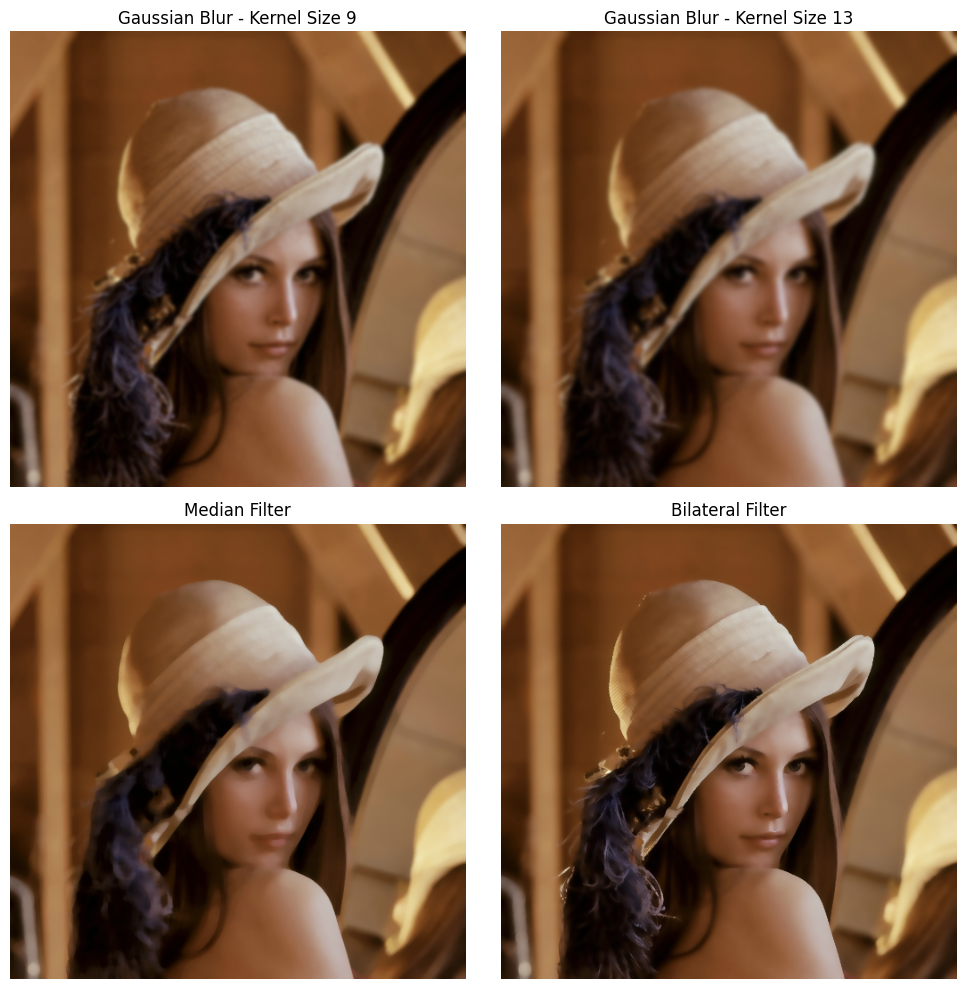

In [ ]:
image = cv2.imread('lenna.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (512, 512))

# Initialize a subplot of 2x2 with different filters
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Gaussian Blur with different kernel sizes
for i, ax in zip([9, 13], axes[0]):
    blurred_image = cv2.GaussianBlur(image, (i, i), 0)
    ax.imshow(blurred_image)
    ax.set_title(f'Gaussian Blur - Kernel Size {i}')
    ax.axis('off')

# Median Filter
median_filtered = cv2.medianBlur(image, 9)
axes[1, 0].imshow(median_filtered)
axes[1, 0].set_title('Median Filter')
axes[1, 0].axis('off')

# Bilateral Filter
bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)
axes[1, 1].imshow(bilateral_filtered)
axes[1, 1].set_title('Bilateral Filter')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

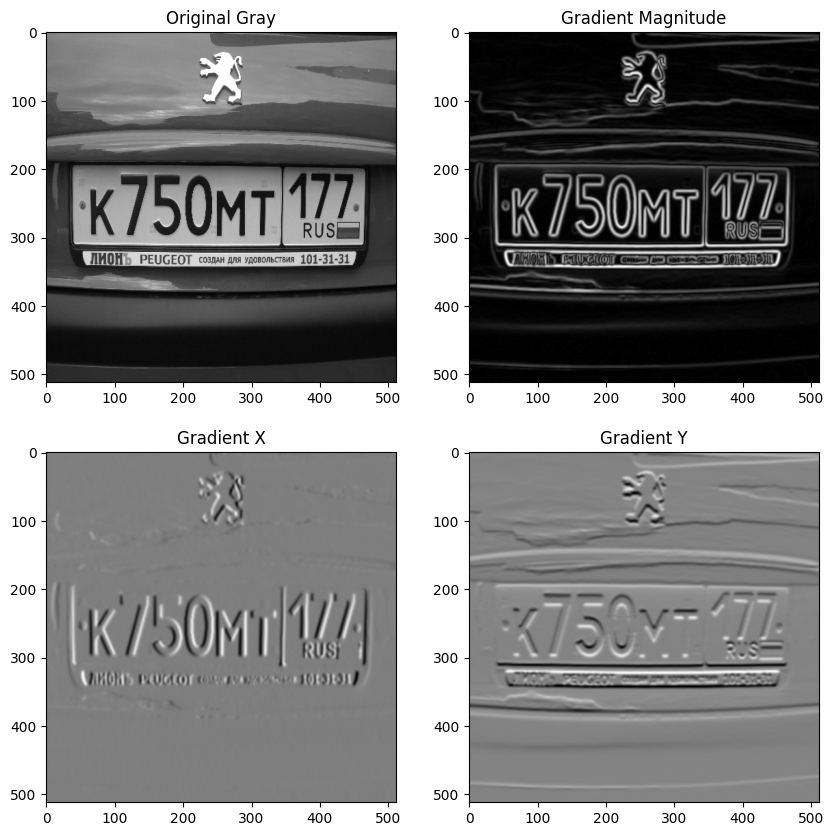

In [ ]:
image = cv2.imread('plate.jpg')
image = cv2.resize(image, (512, 512))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (9, 9), 0)

grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

magnitude = cv2.magnitude(grad_x, grad_y)
angle = cv2.phase(grad_x, grad_y, angleInDegrees=True)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Gray')

plt.subplot(2, 2, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(2, 2, 3)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X')

plt.subplot(2, 2, 4)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y')

plt.show()

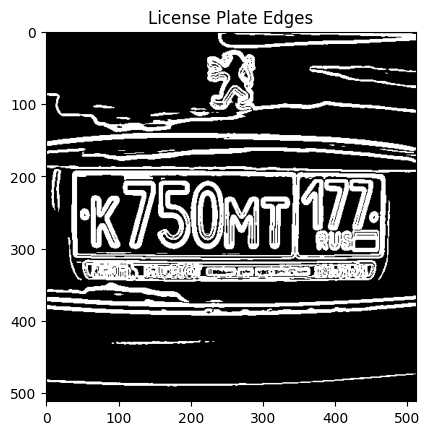

In [ ]:
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_magnitude = np.uint8(gradient_magnitude)

# Thresholding to get binary image
_, thresh = cv2.threshold(gradient_magnitude, 40, 255, cv2.THRESH_BINARY)

# Display the result
plt.imshow(thresh, cmap='gray')
plt.title('License Plate Edges')
plt.show()

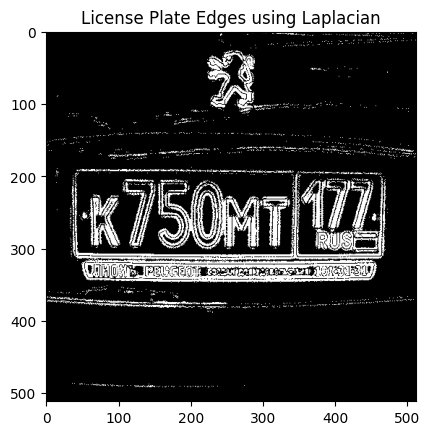

In [ ]:
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
_, binary = cv2.threshold(laplacian, 5, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.title('License Plate Edges using Laplacian')
plt.show()

Task 2

Your task is to develop a method to automatically crop the license plate from an image of a car, utilizing the knowledge that the license plate is predominantly white.

Ideas:
...


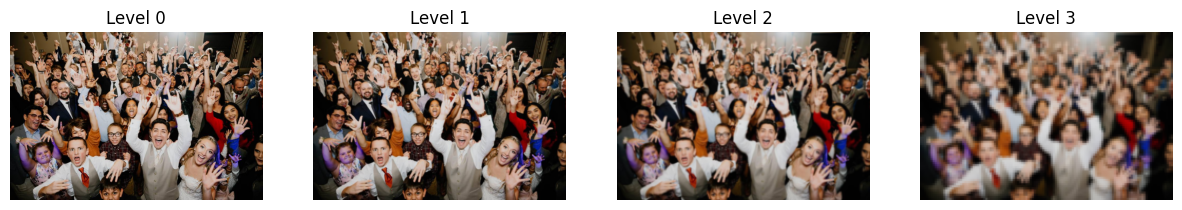

In [ ]:
image = cv2.imread('faces.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

def gaussian_pyramid(image, levels):
    pyramid = [image]
    for i in range(levels):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

levels = 3
pyramid = gaussian_pyramid(image, levels)

# Display the pyramid
fig, axs = plt.subplots(1, levels + 1, figsize=(15, 5))
for i, p in enumerate(pyramid):
    axs[i].imshow(p)
    axs[i].set_title(f'Level {i}')
    axs[i].axis('off')
plt.show()

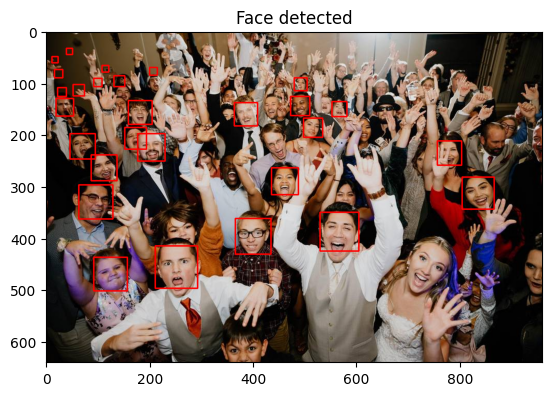

In [ ]:
image = cv2.imread('faces.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces at multiple scales
def detect_faces(pyramid):
    faces = []
    for i, level in enumerate(pyramid):
        scale = 1 / (2 ** i)  # Scaling factor
        detected_faces = face_cascade.detectMultiScale(level, scaleFactor=1.2, minNeighbors=2)
        for (x, y, w, h) in detected_faces:
            faces.append((int(x * scale), int(y * scale), int(w * scale), int(h * scale)))
    return faces

# Create a Gaussian pyramid
pyramid = gaussian_pyramid(image, 1)

# Detect faces
faces = detect_faces(pyramid)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(image)
plt.title('Face detected')
plt.show()

## Hint for homework

https://www.uio.no/studier/emner/matnat/its/nedlagte-emner/UNIK4690/v17/forelesninger/lecture_2_3_blending.pdf